# ME314 Homework 7

###Submission instructions

Deliverables that should be included with your submission are shown in **bold** at the end of each problem statement and the corresponding supplemental material. **Your homework will be graded IFF you submit a single PDF, .mp4 videos of animations when requested and a link to a Google colab file that meet all the requirements outlined below.**

- List the names of students you've collaborated with on this homework assignment.
- Include all of your code (and handwritten solutions when applicable) used to complete the problems.
- Highlight your answers (i.e. **bold** and outline the answers) for handwritten or markdown questions and include simplified code outputs (e.g. .simplify()) for python questions.
- Enable Google Colab permission for viewing 
 * Click Share in the upper right corner
 * Under "Get Link" click "Share with..." or "Change" 
 * Then make sure it says "Anyone with Link" and "Editor" under the dropdown menu
- Make sure all cells are run before submitting (i.e. check the permission by running your code in a private mode)
 * Please don't make changes to your file after submitting, so we can grade it!
- Submit a link to your Google Colab file that has been run (before the submission deadline) and don't edit it afterwards!

**NOTE:** This Jupyter Notebook file serves as a template for you to start homework. Make sure you first copy this template to your own Google driver (click "File" -> "Save a copy in Drive"), and then start to edit it.

In [1]:
import sympy as sym
def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.1/latest.js?config=TeX-AMS_HTML"
    javascript(url=url)
    return sym.printing.latex(exp,**options)
sym.init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

## Problem 1 (20pts)

Show that if $R\in SO(n)$, then the matrix $A=\frac{d}{dt}(R)R^{-1}$ is skew symmetric.
    
**Turn in: A scanned (or photograph from your phone or webcam) copy of your hand written solution. Or you can use \LaTeX.**

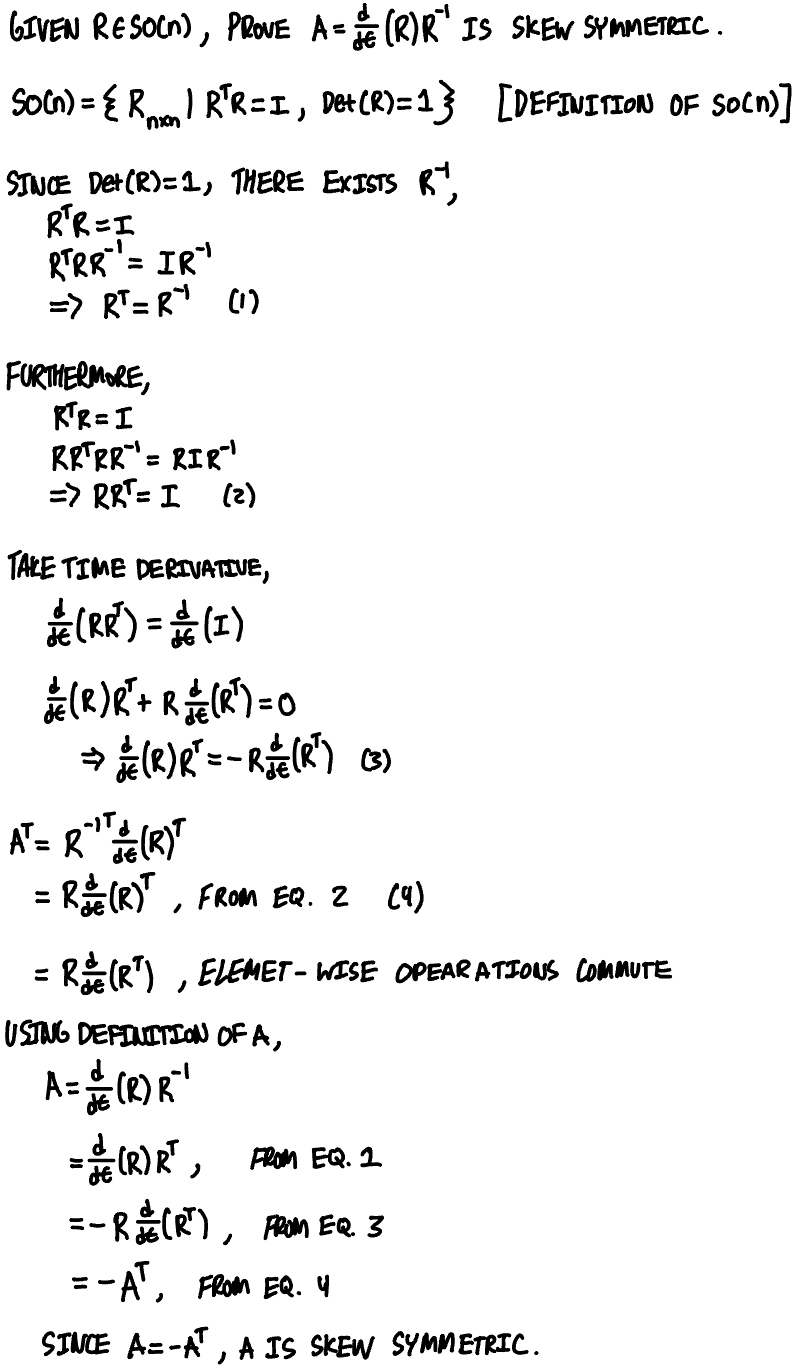

## Problem 2 (20pts)

Show that $\underline{\widehat{\omega}}\,\underline{r}_b= -\underline{\widehat{r}}_b\, \underline{\omega}$. 
    
**Turn in: A scanned (or photograph from your phone or webcam) copy of your hand written solution. Or you can use \LaTeX.**

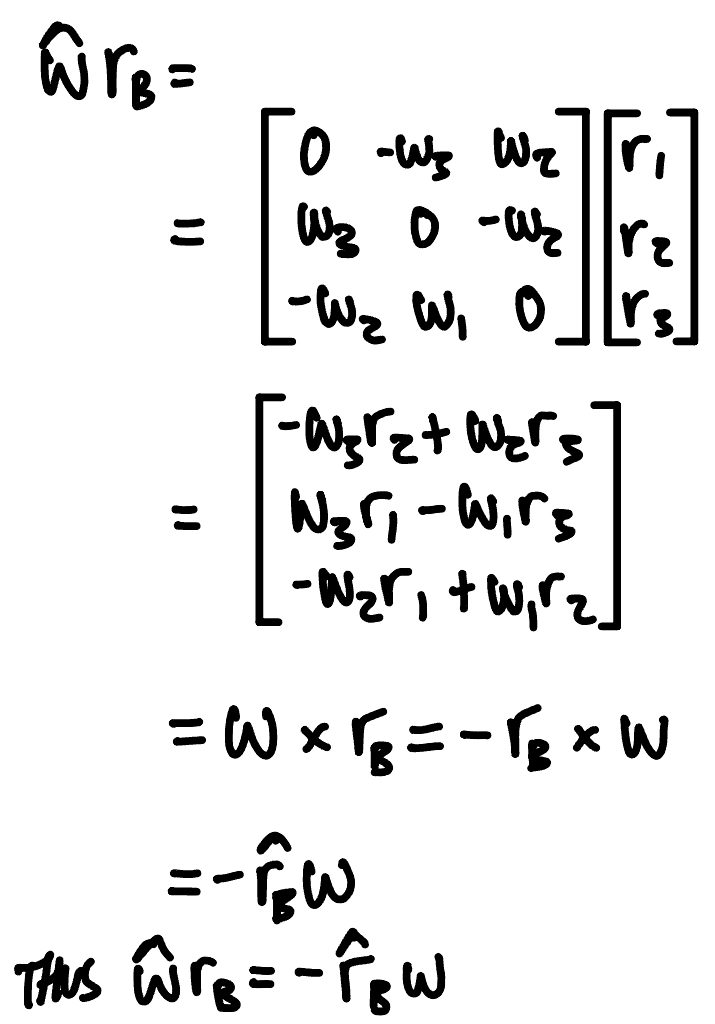

In [2]:
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/MuchenSun/ME314pngs/raw/master/biped_simplified.jpg' width=600' height='350'></table>"))

## Problem 3 (60pts)

Consider a person doing the splits (shown in the image above). To simplify the model, we ignore the upper body and assume the knees can not bend --- which means we only need four variables $q=[x, y, \theta_1, \theta_2]$ to configure the system. $x$ and $y$ are the position of the intersection point of the two legs, $\theta_1$ and $\theta_2$ are the angles between the legs and the green vertical dash line. The feet are constrained on the ground, and there is no friction between the feet and the ground. 
    
Each leg is a rigid body with length $L=1$, width $W=0.2$, mass $m=1$, and rotational inertia $J=1$ (assuming the center of mass is at the center of geometry). Moreover, there are two torques applied on $\theta_1$ and $\theta_2$ to control the legs to track a desired trajectory:
$$
\begin{aligned}
\theta_1^d(t) & = \frac{\pi}{15} + \frac{\pi}{3} \sin^2(\frac{t}{2}) \\
\theta_2^d(t) & =-\frac{\pi}{15} - \frac{\pi}{3} \sin^2(\frac{t}{2})
\end{aligned}
$$ and the torques are:
$$
\begin{aligned}
F_{\theta_1 }& = -k_1(\theta_1-\theta_1^d)\\
F_{\theta_2} & = -k_1(\theta_2-\theta_2^d)
\end{aligned}
$$ In this problem we use $k_1=20$. 

Given the model description above, define the frames that you need (several example frames are shown in the image as well), simulate the motion of the biped from rest for $t\in[0,10], dt=0.01$, with initial condition $q=[0, L_1\cos(\frac{\pi}{15}), \frac{\pi}{15}, -\frac{\pi}{15}]$. You will need to modify the animation function to display the leg as a rectangle, an example of the animation can be found at [https://youtu.be/w8XHYrEoWTc](https://youtu.be/w8XHYrEoWTc). 

*Hint 1: Even though this is a 2D system, in order to compute kinetic energy from both translation and rotation you will need to model the system in the 3D world --- the $z$ coordinate is always zero and the rotation is around the $z$ axis (based on these facts, what should the SE(3) matrix and rotational inertia tensor look like?). This also means you need to represent transformations in  SE(3) and the body velocity $\mathcal{V}_b\in\mathbb{R}^6$.*

*Hint 2: It could be helpful to define several helper functions for all the matrix operations you will need to use. For example, a function that returns SE(3) matrices given a rotation angle and 2D translation vector, functions for ''hat'' and ''unhat'' operations, a function for the matrix inverse of SE(3) (which is definitely not the same as the SymPy matrix inverse function), and a function that returns the time derivative of SO(3) or SE(3).*

*Hint 3: In this problem the external force depends on time $t$. Therefore, in order to solve for the symbolic solution you need to substitute your configuration variables, which are defined as symbolic functions of time $t$ (such as $\theta_1(t)$ and $\frac{d}{dt}\theta_1(t)$), with dummy symbolic variables. For the same reason (the dynamics now explicitly depend on time), you will need to do some tiny modifications on the ''integrate'' and ''simulate'' functions, a good reference can be found at [https://en.wikipedia.org/wiki/Runge-Kutta_methods](https://en.wikipedia.org/wiki/Runge-Kutta_methods).*

*Hint 4: Symbolically solving this system should be fast, but if you encountered some problem when solving the dynamics symbolically, an alternative method is to solve the system numerically --- substitute in the system state at each time step during simulation and solve for the numerical solution --- but based on my experience, this would cost more than one hour for 500 time steps, so it's not recommended.*

*Hint 5: The animation of this problem is similar to the one in last homework --- the coordinates of the vertices in the body frame are constant, you just need to transfer them back to the world frame using the the transformation matrices you already have in the simulation.*

*Hint 6: Be careful to consider the relationship between the frames and to not build in any implicit assumptions (such as assuming some variables are fixed).*

*Hint 7: The rotation, by convention, is assumed to follow the right hand rule, which means the z-axis is out of the screen and the positive rotation orientation is counter-clockwise. Make sure you follow a consistent set of positive directions for all the computation.*

*Hint 8: This problem is designed as a ''mini-project'', it could help you estimate the complexity of your final project, and you could adjust your proposal based on your experience with this problem.*

**Turn in: A copy of the code used to simulate and animate the system. Also, include a plot of the trajectory and upload a video of the animation separately through Canvas. The video should be in ".mp4" format, you can use screen capture or record the screen directly with your phone.**

In [3]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def integrate (f, xt, dt, _t):
  k1 = dt*f(xt, _t)
  k2 = dt*f(xt+k1/2., _t+dt/2.)
  k3 = dt*f(xt+k2/2., _t+dt/2.)
  k4 = dt*f(xt+k3, _t+dt)
  new_xt = xt + (1/6.)*(k1 + 2.0*k2 + 2.0*k3 + k4)
  return new_xt

def simulate(f, x0, tspan, dt, integrate):
  N = int((max(tspan)-min(tspan))/dt)
  x = np.copy(x0)
  tvec = np.linspace(min(tspan),max(tspan),N)
  xtraj = np.zeros((len(x0),N))
  for i in range(N):
    xtraj[:,i] = integrate(f,[*x],dt, tvec[i])
    x = np.copy(xtraj[:,i])
  return xtraj


def transformation(angle, x, y):
  return sym.Matrix([
      [sym.cos(angle), -sym.sin(angle), 0.0, x],
      [sym.sin(angle), sym.cos(angle), 0.0, y],
      [0.0, 0.0, 1.0, 0.0],
      [0.0, 0.0, 0.0, 1.0]
  ])


def unhat(m):
  return sym.Matrix([m[0,3], m[1,3], m[2,3], m[2,1], m[0,2], m[1,0]])

def inverse(m):
  R = sym.Matrix([
      [m[0,0], m[0,1], m[0,2]],
      [m[1,0], m[1,1], m[1,2]],
      [m[2,0], m[2,1], m[2,2]]
  ]).T

  v = -R * sym.Matrix([m[0,3], m[1,3], m[2,3]])
  return sym.Matrix([
      [R[0,0], R[0,1], R[0,2], v[0]],
      [R[1,0], R[1,1], R[1,2], v[1]],
      [R[2,0], R[2,1], R[2,2], v[2]],
      [0,0,0,1]
  ])

In [5]:
L = 1
W = 0.2
m = 1
J = 1
g = 9.8
dt = 0.01
t_range = [0,10]

In [6]:
t = sym.symbols("t")
t1 = sym.Function("theta_1")(t)
t2 = sym.Function("theta_2")(t)
x = sym.Function("x")(t)
y = sym.Function("y")(t)

q = sym.Matrix([x, y, t1, t2])
qdot = q.diff(t)
qddot = qdot.diff(t)

In [7]:
# Define transformations
g_wa = transformation(0, q[0], q[1])
g_wb = g_wa * transformation(t1, 0, 0) * transformation(0, 0, -L/2)
g_wc = g_wa * transformation(t2, 0, 0) * transformation(0, 0, -L/2)

# Constraint transformations
g_wb_bottom = g_wa * transformation(t1, 0, 0) * transformation(0, 0, -L)
g_wc_bottom = g_wa * transformation(t2, 0, 0) * transformation(0, 0, -L)

In [8]:
# Inertia matrix
I_b = sym.Matrix([
    [m, 0, 0, 0, 0, 0],
    [0, m, 0, 0, 0, 0],
    [0, 0, m, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, J]

]) 

I_c = sym.Matrix([
    [m, 0, 0, 0, 0, 0],
    [0, m, 0, 0, 0, 0],
    [0, 0, m, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, J]

]) 

In [9]:
# Body velocities
V_b = unhat(inverse(g_wb)*g_wb.diff(t))
V_c = unhat(inverse(g_wc)*g_wc.diff(t))

In [10]:
# Kinetic energy
KE_b = 0.5 * (V_b.T * I_b * V_b)[0]
KE_c = 0.5 * (V_c.T * I_c * V_c)[0]

In [11]:
# Potential energy
PE_b = m * g * (g_wb * sym.Matrix([0,0,0,1]))[1]
PE_c = m * g * (g_wc * sym.Matrix([0,0,0,1]))[1]

In [12]:
# Lagrangian
L = sym.simplify((KE_b + KE_c) - (PE_b + PE_c))

In [13]:
# Constraints
phi1 = (g_wb_bottom * sym.Matrix([0,0,0,1]))[1] 
phi2 = (g_wc_bottom * sym.Matrix([0,0,0,1]))[1] 
phi = sym.Matrix([phi1, phi2])
lamb1, lamb2 = sym.symbols("lambda_1, lambda_2")
lamb = sym.Matrix([lamb1, lamb2])

In [14]:
# External forces
k1 = 20.0
t1_path = sym.pi/15. + sym.pi/3. * sym.sin(t/2.)**2
t2_path = -sym.pi/15. - sym.pi/3. * sym.sin(t/2.)**2
F = sym.Matrix([0,0, -k1 * (t1 - t1_path), -k1 * (t2 - t2_path)])

In [15]:
# Euler-Lagrange Eq
ELEQ = sym.Eq(L.diff(qdot).diff(t) - L.diff(q), phi1.diff(q) * lamb1 + phi2.diff(q) * lamb2 + F)
phi1_EQ = sym.Eq(0, phi1.diff(t).diff(t))
phi2_EQ = sym.Eq(0, phi2.diff(t).diff(t))

In [16]:
# Solve
sol = sym.solve([ELEQ,phi1_EQ, phi2_EQ], [*qddot, *lamb])

In [17]:
# Lambdify
sol_x = sym.lambdify([*q, *qdot, t], sol[qddot[0]])
sol_y = sym.lambdify([*q, *qdot, t], sol[qddot[1]])
sol_t1 = sym.lambdify([*q, *qdot, t], sol[qddot[2]])
sol_t2 = sym.lambdify([*q, *qdot, t], sol[qddot[3]])

In [18]:
def dyn(s, t):
  return np.array([s[4], s[5], s[6], s[7], 
                   sol_x(*s, t), sol_y(*s, t), sol_t1(*s, t), sol_t2(*s, t)])

In [19]:
s0 = [0.0, np.cos(np.pi/15), np.pi/15, -np.pi/15, 0.0, 0.0, 0.0, 0.0]
traj = simulate(dyn, s0, [0,10], 0.1, integrate)

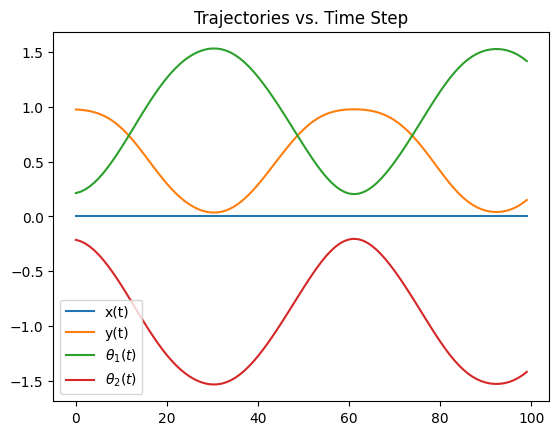

In [20]:
plt.figure()
plt.plot(traj[0:4].T)
plt.legend(["x(t)", "y(t)", r'$\theta_1(t)$', r'$\theta_2(t)$'])
plt.title("Trajectories vs. Time Step")
plt.show()

In [23]:
def animate(input_arr,L=1, W=0.2, T=10):


    ################################
    # Imports required for animation.
    from plotly.offline import init_notebook_mode, iplot
    from IPython.display import display, HTML
    import plotly.graph_objects as go

    #######################
    # Browser configuration.
    def configure_plotly_browser_state():
        import IPython
        display(IPython.core.display.HTML('''
            <script src="/static/components/requirejs/require.js"></script>
            <script>
              requirejs.config({
                paths: {
                  base: '/static/base',
                  plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
                },
              });
            </script>
            '''))
    configure_plotly_browser_state()
    init_notebook_mode(connected=False)

    ###############################################
    # Getting data

    x_array = input_arr[0]
    y_array = input_arr[1]
    t1_array = input_arr[2]
    t2_array = input_arr[3]

    N = len(input_arr[0]) # Need this for specifying length of simulation


    ###############################################
    # Define arrays containing data for frame axes

    # Use homogeneous tranformation to transfer these two axes/points
    # back to the fixed frame
    b_1_x = np.zeros(N)
    b_1_y = np.zeros(N)
    b_2_x = np.zeros(N)
    b_2_y = np.zeros(N)
    b_3_x = np.zeros(N)
    b_3_y = np.zeros(N)
    b_4_x = np.zeros(N)
    b_4_y = np.zeros(N)

    c_1_x = np.zeros(N)
    c_1_y = np.zeros(N)
    c_2_x = np.zeros(N)
    c_2_y = np.zeros(N)
    c_3_x = np.zeros(N)
    c_3_y = np.zeros(N)
    c_4_x = np.zeros(N)
    c_4_y = np.zeros(N)

    def transform_np(angle, x, y):
      return np.array([[np.cos(angle), -np.sin(angle), 0.0, x],[np.sin(angle), np.cos(angle), 0.0, y],[0.0, 0.0, 1.0, 0.0],[0.0, 0.0, 0.0, 1.0]])

    for t in range(N): # iteration through each time step
        # evaluate homogeneous transformation

        _x = x_array[t]
        _y = y_array[t]
        _t1 = t1_array[t]
        _t2 = t2_array[t]

        t_wa = transform_np(0, _x, _y)
        t_wb = t_wa @ (transform_np(_t1,0,0) @ (transform_np(0,0,-L/2)))
        t_wc = t_wa @ (transform_np(_t2,0,0) @ (transform_np(0,0,-L/2)))

        b = t_wb.dot(np.array([W/2, L/2, 0, 1]))
        b_1_x[t] = b[0]
        b_1_y[t] = b[1]


        b = t_wb.dot(np.array([-W/2, L/2, 0, 1]))
        b_2_x[t] = b[0]
        b_2_y[t] = b[1]


        b = t_wb.dot(np.array([-W/2, -L/2, 0, 1]))
        b_3_x[t] = b[0]
        b_3_y[t] = b[1]


        b = t_wb.dot(np.array([W/2, -L/2, 0, 1]))
        b_4_x[t] = b[0]
        b_4_y[t] = b[1]

        c = t_wc.dot(np.array([W/2, L/2, 0, 1]))
        c_1_x[t] = c[0]
        c_1_y[t] = c[1]


        c = t_wc.dot(np.array([-W/2, L/2, 0, 1]))
        c_2_x[t] = c[0]
        c_2_y[t] = c[1]


        c = t_wc.dot(np.array([-W/2, -L/2, 0, 1]))
        c_3_x[t] = c[0]
        c_3_y[t] = c[1]


        c = t_wc.dot(np.array([W/2, -L/2, 0, 1]))
        c_4_x[t] = c[0]
        c_4_y[t] = c[1]

    ####################################
    # Using these to specify axis limits.
    xm = -3 #np.min(xx1)-0.5
    xM = 3 #np.max(xx1)+0.5
    ym = -3 #np.min(yy1)-2.5
    yM = 3 #np.max(yy1)+1.5

    ###########################
    # Defining data dictionary.
    # Trajectories are here.
    data=[

        dict(name='B'),
        dict(name='C'),
        dict(x=[xm, xM], y=[0,0], mode="lines", name="Ground", line=dict(color="green",width=4)),
    ]

    ################################
    # Preparing simulation layout.
    # Title and axis ranges are here.
    layout=dict(autosize=False, width=1000, height=1000,
                xaxis=dict(range=[xm, xM], autorange=False, zeroline=False,dtick=1),
                yaxis=dict(range=[ym, yM], autorange=False, zeroline=False,scaleanchor = "x",dtick=1),
                title='Split Simulation', 
                hovermode='closest',
                updatemenus= [{'type': 'buttons',
                               'buttons': [{'label': 'Play','method': 'animate',
                                            'args': [None, {'frame': {'duration': T, 'redraw': False}}]},
                                           {'args': [[None], {'frame': {'duration': T, 'redraw': False}, 'mode': 'immediate',
                                            'transition': {'duration': 0}}],'label': 'Pause','method': 'animate'}
                                          ]
                              }]
               )

    ########################################
    # Defining the frames of the simulation.
    # This is what draws the lines from
    # joint to joint of the pendulum.
    frames=[
        dict(data=[
            dict(x=[b_1_x[k],
                    b_2_x[k],
                    b_3_x[k],
                    b_4_x[k],
                    b_1_x[k]],
                 y=[b_1_y[k],
                    b_2_y[k],
                    b_3_y[k],
                    b_4_y[k],
                    b_1_y[k]],
                 mode="lines",
                 line=dict(color="red",width=4,),),                 
                 
            dict(x=[c_1_x[k],
                    c_2_x[k],
                    c_3_x[k],
                    c_4_x[k],
                    c_1_x[k]],
                 y=[c_1_y[k],
                    c_2_y[k],
                    c_3_y[k],
                    c_4_y[k],
                    c_1_y[k]],
                 mode="lines",
                 line=dict(color="blue",width=4,),)
        
          ]) for k in range(N)
      ]

    #######################################
    # Putting it all together and plotting.
    figure1=dict(data=data, layout=layout, frames=frames)           
    iplot(figure1)

In [24]:
animate(traj)

Output hidden; open in https://colab.research.google.com to view.